<a href="https://colab.research.google.com/github/makaires77/Grafos-2021/blob/main/P5b_PPGIA_Bipartite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p> <img src="https://drive.google.com/uc?export=view&id=14ecpPr37UaWMNtZYQ3TgLyvYO6Wgh-qA" align="right" width="200px"> </p>

# Atividade 6 - Louvain - Autoria PPGIA<br>
AIRES, Marcos. CARUBBI, Ricardo. SIQUEIRA, Fernando. Alunos de Análise de Dados em Grafos.<br>
Professor orientador: Prof. Dr. Raimir Holanda.<br>
Programa de Pós-Graduação em Informática Aplicada. Universidade de Fortaleza - UNIFOR.




## Objetivo

O objetivo desta versão do trabalho é realizar as análises e cortes restrito ao grafo dos professores do PPGIA e respectivos trabalhos publicados.

## Aplicação

In [56]:
# Importação dos módulos do NetworkX
import networkx as nx
from networkx import bipartite
from networkx import NetworkXError
from networkx import edge_betweenness_centrality
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.centrality import girvan_newman
import community as community_louvain

from matplotlib import pyplot as plt
import matplotlib.cm as cm

from numpy import random as nprand

#Importação dos módulos de suporte
import re, random, itertools, copy
from numpy import random as nprand
import pandas as pd

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

## Configurações

In [57]:
# Endereço da base de dados
# local = '/content/drive/MyDrive/Colab Notebooks/GRAFOS/P3/'
local = 'datasets/'

# Configuração de plotagem
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (25, 15),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

# Fixação do seed
seed = 200
nprand.seed(seed)


## Carregar o Grafo a partir do arquivo CSV.

Código do aluno Marcos Aires para tratamento e limpeza dos dados.

In [58]:
_autor_union = pd.read_csv(local + 'lst_autorunion.csv', sep=';')
_autorias    = pd.read_csv(local + 'ppgia_coautoria-bipartite.csv',sep=';')
_coautorias    = pd.read_csv(local + 'ppgia_coautorias.csv')


In [59]:
autorias        = pd.DataFrame(_autorias)
lst_autor       = sorted(set(autorias['AUTORES'].unique()))

print('Quantidade de Autores Antes: ',len(lst_autor))

for n in range(len(autorias['AUTORES'])):
    rem_acentos = autorias['AUTORES'][n].replace("\'","").replace("De ", "de ").replace("Das ","das ").replace("Da ","da ").replace("Do ","do ").replace("Dos ","dos ").replace("Á","A").replace("á","a").replace("â","a").replace("ã","a").replace("à","a").replace("é","e").replace("ê","e").replace("'è","e").replace("í","i").replace("ó","o").replace("ô","o").replace("ú","u")
    autorias['AUTORES'][n]=rem_acentos.replace("\"","").strip()

    for m in range(len(_autor_union)):
        n1=str(autorias['AUTORES'][n]).strip()
        n2=str(_autor_union['NomeDe'][m]).replace('\'','').strip()
#         print(n1, n2)
        if n1 == n2:
#             print(' Alteração de:',n2)
            corrigido=str(_autor_union['NomePara'][m]).replace("\'","").strip()
            autorias['AUTORES'][n]=corrigido.replace("\"","").strip()
#             print('Alterado para:',autorias['AUTORES'][n])

# print(sorted(set(autorias['AUTORES'].unique())))

autorias.to_csv(local + 'ppgia_coautorias.csv', sep=";", index=False)
lst_autor  = sorted(set(autorias['AUTORES'].unique()))
print('-'*90)
print('Quantidade de Autores Depois:',len(lst_autor))

Quantidade de Autores Antes:  984
------------------------------------------------------------------------------------------
Quantidade de Autores Depois: 956


In [60]:
# Criação do grafo não direcionado vazio
B = nx.Graph()

# Professores do PPGIA
PPGIA = ['Placido Rogerio Pinheiro','Adriano Bessa Albuquerque','Americo Tadeu Falcone Sampaio','Joao Batista Furlan Duarte',
               'Joao Jose Vasco Peixoto Furtado','Maria Andreia Formico Rodrigues','Maria Elizabeth Sucupira Furtado',
               'Nabor das Chagas Mendonça','Napoleao Vieira Nepomuceno','Raimir Holanda Filho','Tarcisio Haroldo Cavalcante Pequeno',
               'Vladia Celia Monteiro Pinheiro']


In [61]:
with open(local + 'ppgia_coautorias.csv') as f:
    for row in f:
        # Definição dos nós
        linha = row.strip().split(";")
        print(linha)
        artigo = linha[0]
        autor = linha[2]
        if autor in PPGIA: # Restrição PPGIA
            B.add_edge(autor, artigo)
            # Definição dos atributos dos nós
            B.nodes[autor]["bipartite"] = 0
            B.nodes[artigo]["bipartite"] = 1

['ANO', 'TITULO', 'AUTORES']
['1989', 'O CÃ\xadrculo Dos Nove Pontos', 'Placido Rogerio Pinheiro']
['1990', 'Um Estudo Sobre As Perdas Em Barras De Ferro AtravÃ©s Da ProgramaÃ§Ã£o Linear', 'Placido Rogerio Pinheiro']
['1990', 'Um Estudo Sobre As Perdas Em Barras De Ferro AtravÃ©s Da ProgramaÃ§Ã£o Linear', 'Humberto Jansen']
['1991', 'TÃ©cnicas Alternativas Para ResoluÃ§Ã£o De Um Problema De ProgramaÃ§Ã£o Linear', 'Placido Rogerio Pinheiro']
['1991', 'TÃ©cnicas Alternativas Para ResoluÃ§Ã£o De Um Problema De ProgramaÃ§Ã£o Linear', 'Adriana Carlos Paz']
['1991', 'TÃ©cnicas Alternativas Para ResoluÃ§Ã£o De Um Problema De ProgramaÃ§Ã£o Linear', 'Charles Bezerra Martins']
['1991', 'TÃ©cnicas Alternativas Para ResoluÃ§Ã£o De Um Problema De ProgramaÃ§Ã£o Linear', 'Neudson Cavalcante Albuquerque']
['1991', 'TÃ©cnicas Alternativas Para ResoluÃ§Ã£o De Um Problema De ProgramaÃ§Ã£o Linear', 'Rodrigo Moraes L de Araujo Costa']
['1992', 'De Um Problema De ProgramaÃ§Ã£o Linear Geral Para A Forma Rest

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 4591: character maps to <undefined>

## Representar os dados como um Grafo Bipartido entre os trabalhos publicados e os autores dos trabalhos.

> "Um grafo bipartido é um grafo cujos nós podem ser dividos em dois conjuntos distintos U e V, nos quais cada link (aresta) conecta um nó U a uma nó V."<br>

Barabási, Albert-László ; Pósfai, Márton: Network science. Cambridge : Cambridge University Press, 2016.<br>

> "Seja G = (V,E) um grafo. Se o conjunto de vértices V de G puder ser
particionado em dois subconjuntos não vazios, X e Y (X ∪ Y = V e X ∩ Y =
∅) de tal maneira que cada aresta de G tenha uma extremidade em X e a outra em Y, então G é chamado de bipartido. A partição V = X ∪ Y é chamada de
bipartição de G."

Nicoletti, Maria do Carmo. Fundamentos da teoria dos grafos para computação / Maria do Carmo Nicoletti, Estevam R. Hruschka Jr. - 3. ed. - Rio de Janeiro : LTC, 2018.

> "Um grafo bipartido é aquele que pode ter seus vértices divididos em dois conjuntos ou partições tais que nelas não se encontrem vizinhos. Em caso da existência de k conjuntos de vértices disjuntos, o grafo é dito k-partido."<br>

Goldbarg, Marco Cesar. Grafos : conceitos, algoritmos e aplicações / Marco Goldbarg, Elizabeth Goldbarg. - Rio de Janeiro : Elsevier, 2012.

In [62]:
# Considerando apenas componentes concectados
B = B.subgraph(list(nx.connected_components(B))[0])

# Renomea os labels dos nós como inteiros sequenciais e atribuir o nome completo como atributo
B = nx.relabel.convert_node_labels_to_integers(B, first_label=0, ordering='increasing degree', label_attribute='name')

In [63]:
# Gera e define o atributo 'bipartite' para identificação dos grupos de autores e artigos
autores = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
artigos = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

In [64]:
# Identifica os nós pelo label e pelo atributo 'name'.
[(f'node {x}',B.nodes[x]['name']) for x in autores]

[('node 28', 'Placido Rogerio Pinheiro'),
 ('node 26', 'Maria Elizabeth Sucupira Furtado'),
 ('node 25', 'Joao Jose Vasco Peixoto Furtado'),
 ('node 27', 'Maria Andreia Formico Rodrigues'),
 ('node 18', 'Raimir Holanda Filho'),
 ('node 22', 'Joao Batista Furlan Duarte'),
 ('node 8', 'Vladia Celia Monteiro Pinheiro'),
 ('node 17', 'Americo Tadeu Falcone Sampaio'),
 ('node 11', 'Adriano Bessa Albuquerque'),
 ('node 12', 'Napoleao Vieira Nepomuceno')]

In [65]:
# Identifica o número de autores e artigos
print('Número de autores do PPGIA:', len(autores))
print('Número de trabalhos publicados:', len(artigos))

Número de autores do PPGIA: 10
Número de trabalhos publicados: 19


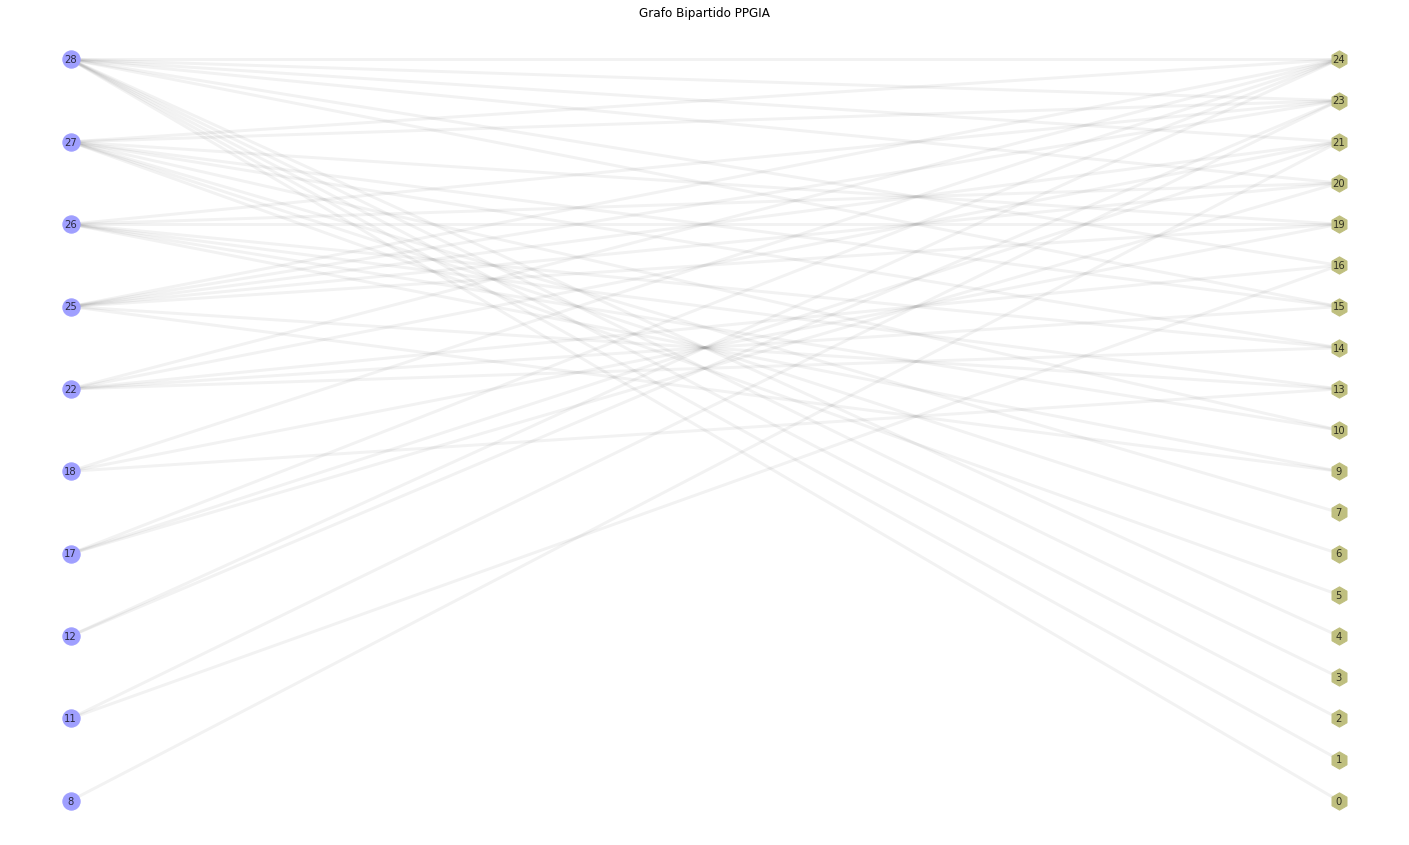

In [66]:
#@title
# Create figure
plt.figure(figsize=(25,15))
plt.title('Grafo Bipartido PPGIA')
# Calculate layout
pos = nx.bipartite_layout(B, autores)
# Draw using different shapes and colors for autores/titulos
nx.draw_networkx_edges(B, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(B, pos, nodelist=artigos, node_color="#bfbf7f", node_shape="h", node_size=300)
nx.draw_networkx_nodes(B, pos, nodelist=autores, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(B, pos, alpha=.75, font_size=10)
plt.savefig(local + 'GRAFO_P3b-1.png', dpi=150)

Pode-se identificar pelo grafo bipartido o grau de cada nó representado pelo respectivo número de arestas, identificando os professores do PPGIA com maior número de trabalhos publicados.

In [67]:
# Identificação de professores ordenados pelo número de trabalhos publicados
full_name_B = nx.get_node_attributes(B, "name")
[(f'node {x}', full_name_B[x], B.degree[x]) for x in sorted(autores, key=lambda x:B.degree[x], reverse=True)]
# [(x, B.degree[x]) for x in sorted(autores, key=lambda x:B.degree[x], reverse=True)]

[('node 28', 'Placido Rogerio Pinheiro', 11),
 ('node 27', 'Maria Andreia Formico Rodrigues', 9),
 ('node 26', 'Maria Elizabeth Sucupira Furtado', 7),
 ('node 25', 'Joao Jose Vasco Peixoto Furtado', 7),
 ('node 22', 'Joao Batista Furlan Duarte', 5),
 ('node 18', 'Raimir Holanda Filho', 3),
 ('node 17', 'Americo Tadeu Falcone Sampaio', 3),
 ('node 11', 'Adriano Bessa Albuquerque', 2),
 ('node 12', 'Napoleao Vieira Nepomuceno', 2),
 ('node 8', 'Vladia Celia Monteiro Pinheiro', 1)]

## Gerar um Grafo Louvain

> A otimização da modularidade oferece uma abordagem inovadora para a detecção da comunidade em redes, pois muitos algoritmos com boa precisão nas partições das comunidades, geram em contrapartida um alto custo computacional, muitas vezes tornando inviável seu uso em redes grandes.

> O método de Louvain é uma das abordagens mais populares em maximização de modularidade devido a sua simplicidade, eficiência e fácil implementação. Assim como o método de Clauset-Newman-Moore, o algoritmo de Louvain procura otimizar localmente as comunidades até que a modularidade global não consiga mais ser melhorada.

> O Algoritmo de Louvain é capaz de trabalhar com redes grandes (i.e vértices na casa dos milhares) com um custo computacional baixo. Basicamente o algoritmo é dividido em duas etapas:

> Etapa I: A modularidade é otimizada por mudanças locais. E escolhido um vértice e calculado a mudança na modularidade, se o vértice se juntar à comunidade de seus vizinhos imediatos. 

> Etapa II: As comunidades obtidas no Etapa I são agregadas, criando uma nova rede de comunidades. Os vértices pertencentes a mesma comunidade são mesclados em um único vértice. Esse processo gerará autoloops, correspondendo as conexões entre vértices na mesma comunidade que agora são incorporados em um único vértice.

Obs: Assim como o método de Clauset-Newman-Moore, este algoritmo também sofre de limite de resolução e falha em detectar pequenas comunidades.


Barabási, Albert-László ; Pósfai, Márton: Network science. Cambridge : Cambridge University Press, 2016.

### Grafo Louvain dos Professores do PPGIA

In [74]:
#compute the best partition
partition = community_louvain.best_partition(B)


In [75]:
# draw the graph
pos = nx.spring_layout(B)

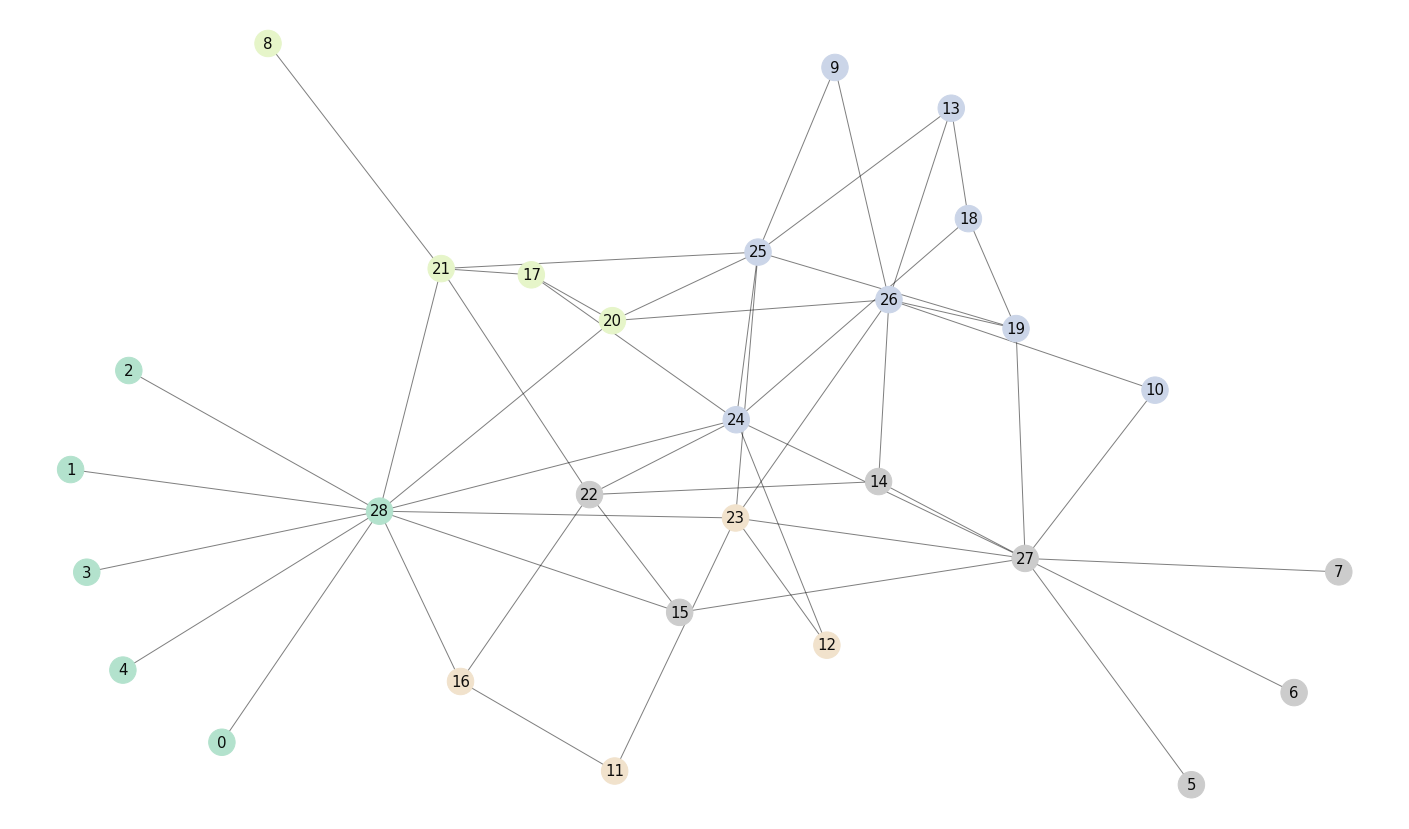

In [76]:
# color the nodes according to their partition
cmap = cm.get_cmap('Pastel2', max(partition.values()) + 1)
nx.draw_networkx_nodes(B, pos, partition.keys(), node_size=700, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(B, pos, alpha=0.5)
nx.draw_networkx_labels(B, pos, alpha=.95, font_size=15)
plt.show()